In [1]:
#importing libraries
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
warnings.filterwarnings('ignore')

In [2]:
file_path = "./Sales_data/" #file path
files = os.listdir(file_path) #storing list of file name as files


In [3]:
all_sales = pd.DataFrame() #creating empty dataframe
for file in files:
    all_csv = pd.read_csv(file_path+file) #file paths to read
    all_sales = all_sales.append(all_csv,ignore_index = True) 

In [4]:
all_sales.head() #reading updated dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_sales = all_sales.dropna(how='all') #dropping the NaN values from the dataframe
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_sales['Quantity Ordered'] = pd.to_numeric(all_sales['Quantity Ordered']) #converting Quantity Ordered to numeric
all_sales['Price Each'] = pd.to_numeric(all_sales['Price Each']) #converting Price Each to numeric
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])
all_sales.insert(4,'Month',all_sales['Order Date'].dt.strftime('%m').astype(int)) #Creating new column mouth from Order date
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [8]:
City=[] #creating new column City based on Purchase Address
for i in all_sales['Purchase Address'].values.astype(str): 
    value = i.split(',')
    City.append(value[1])
all_sales.insert(7,'City', City)
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,City
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco


In [9]:
Price_each = all_sales['Price Each'] #finding sum of Price Each
print('Sum is :', Price_each.sum())

Sum is : 34289130.67999999


In [10]:
Price_each = all_sales['Price Each'] #finding mean of Price Each
print('Mean is :', Price_each.mean())

Mean is : 184.3997347670135


In [11]:
Price_each = all_sales['Price Each'] #finding Standard Deviation of Price Each
print('Standard Deviation is:', Price_each.std())

Standard Deviation is: 332.7313298840936


In [12]:
Price_each = all_sales['Price Each'] #finding skweness of Price Each
print('Skweness is :', Price_each.skew())

Skweness is : 2.8721487292935257


In [13]:
Price_each = all_sales['Price Each'] #finding Kurtosis of Price Each
print('Kurtosis is :',Price_each.kurtosis())

Kurtosis is : 9.094568341148197


In [14]:
correlation = all_sales.corr() #finding correlation of Price Each
correlation

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


In [15]:
all_sales['Sales'] = all_sales['Quantity Ordered']*all_sales['Price Each'] #Adding Sales column
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,City,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,8.97
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,700.00
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,379.99


In [16]:
all_sales.groupby('Month').sum() #grouping by month and adding the sales

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1.421631e+09,10903.0,1811768.38,1822256.73
2,1.871053e+09,13449.0,2188884.72,2202022.42
3,2.564811e+09,17005.0,2791207.83,2807100.38
4,3.387347e+09,20558.0,3367671.02,3390670.24
5,3.345872e+09,18667.0,3135125.13,3152606.75
6,2.932976e+09,15253.0,2562025.61,2577802.26
7,3.284140e+09,16072.0,2632539.56,2647775.76
8,2.899374e+09,13448.0,2230345.42,2244467.88
9,2.948727e+09,13109.0,2084992.09,2097560.13


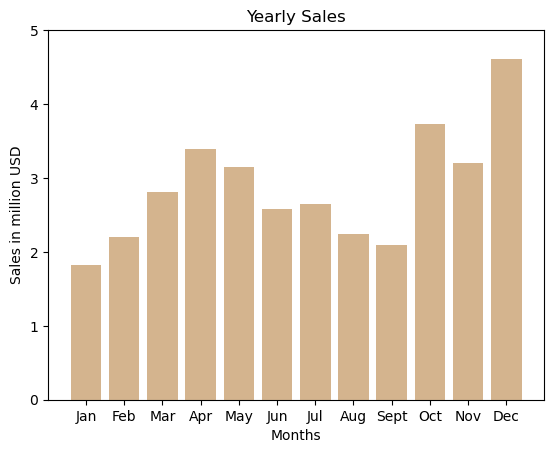

In [17]:
months = range(1,13)#for x axes
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'] #defining months
results = all_sales.groupby('Month').sum()
plt.bar(months, results['Sales'],color = "#AB6B1F",alpha= 0.5)
plt.xticks(months)
labels,location = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int)) #scaling in million USD
plt.ylabel('Sales in million USD') #labelling y axis
plt.xlabel('Months') #labelling X axis
plt.title("Yearly Sales")
plt.show()

In [18]:
cities = all_sales.groupby('City').sum() #grouping by City
cities

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta,3.423838e+09,16602.0,2779908.20,104794,2795498.58
Austin,2.280982e+09,11153.0,1809873.61,69829,1819581.75
Boston,4.598265e+09,22528.0,3637409.77,141112,3661642.01
Dallas,3.415644e+09,16730.0,2752627.82,104620,2767975.40
Los Angeles,6.811085e+09,33289.0,5421435.23,208325,5452570.80
New York City,5.736334e+09,27932.0,4635370.83,175741,4664317.43
Portland,2.868861e+09,14053.0,2307747.47,87765,2320490.61
San Francisco,1.030444e+10,50239.0,8211461.74,315520,8262203.91
Seattle,3.406694e+09,16553.0,2733296.01,104941,2747755.48


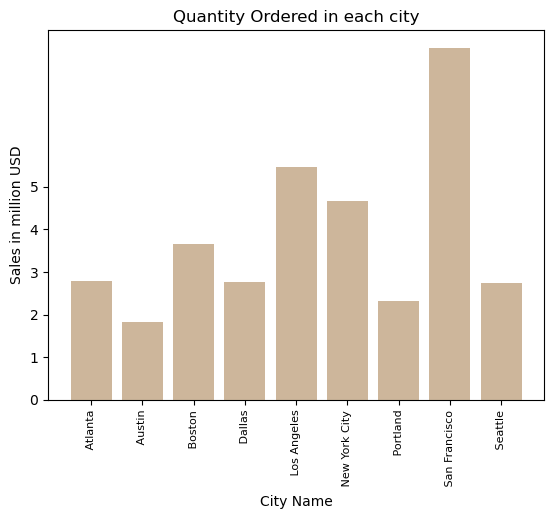

In [19]:
plt.bar(cities['Sales'].index, cities['Sales'].values, color ="#CDB69B")
plt.xticks(rotation ='vertical',size= 8)
plt.yticks(labels, (labels/1000000).astype(int)) #scaling in million USD
labels,location = plt.yticks()
plt.ylabel('Sales in million USD') #labelling y axis
plt.xlabel('City Name') #labelling x axis
plt.title('Quantity Ordered in each city')
plt.show()

In [26]:
product_sales = all_sales.groupby('Product') #grouping by Product
product_sales.sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales
Product,,,,,
20in Monitor,9.508897e+08,4129.0,451068.99,29336,454148.71
27in 4K Gaming Monitor,1.442589e+09,6244.0,2429637.70,44440,2435097.56
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558,1132424.50
34in Ultrawide Monitor,1.418986e+09,6199.0,2348718.19,43304,2355558.01
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558,106118.40
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370,92740.83
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477,2349150.00
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113,1345565.43
Flatscreen TV,1.110943e+09,4819.0,1440000.00,34224,1445700.00


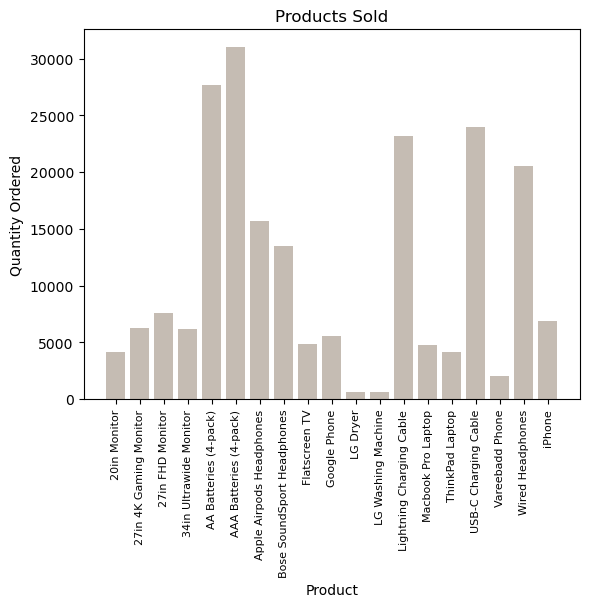

In [21]:
product_sales = all_sales.groupby('Product')
quantity_ordered = product_sales.sum()['Quantity Ordered']
products = [product for product, df in product_sales]
plt.bar(products, quantity_ordered, color = "#8D7B68",alpha= 0.5)
plt.ylabel('Quantity Ordered') #labelling y axis
plt.xlabel('Product') #labelling x axis
plt.xticks(products, rotation ='vertical', size=8)
plt.title("Products Sold")
plt.show()


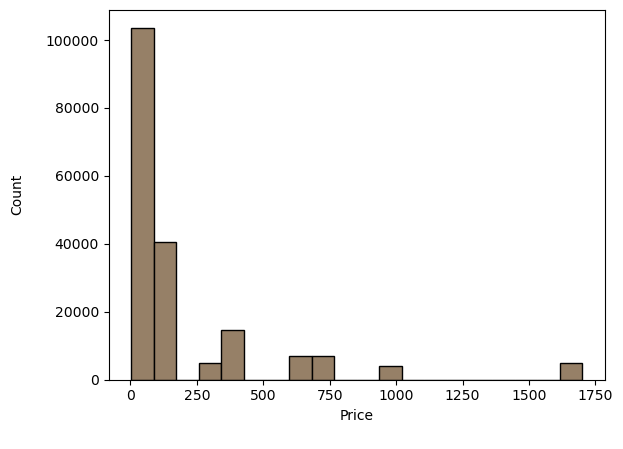

In [22]:
plt.hist(all_sales['Price Each'], color = "#968067", bins = 20, edgecolor='black') #adding color with black border
plt.xlabel('Price\n') #labelling x-axis as Price
plt.ylabel('Count\n') #labelling y-axis as Count
plt.show()

In [23]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Month             185950 non-null  int32         
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   City              185950 non-null  object        
 8   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(3)
memory usage: 13.5+ MB
